In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

In [134]:
weights = torch.tensor([0.1, 0.2, 0.6, 0.1], dtype=torch.float) # create a tensor of weights
torch.multinomial(weights, 2)

tensor([2, 0])

In [74]:
chn_ids.shape

torch.Size([2])

In [8]:
cond = torch.rand(2, 4, 3)
cond_ind = torch.randint(low=0, high=4, size=(2, 1, 3))
cond_ind = (cond_ind > 0).float()

In [15]:
cond_ind

tensor([[[1., 1., 1.]],

        [[1., 0., 1.]]])

In [13]:
cond

tensor([[[0.7144, 0.2697, 0.8196],
         [0.2590, 0.1846, 0.1688],
         [0.6476, 0.5651, 0.9869],
         [0.4280, 0.5500, 0.9660]],

        [[0.5265, 0.4155, 0.6843],
         [0.7053, 0.8829, 0.6416],
         [0.9878, 0.3706, 0.4291],
         [0.3935, 0.9955, 0.1402]]])

In [14]:
cond*cond_ind

tensor([[[0.7144, 0.2697, 0.8196],
         [0.2590, 0.1846, 0.1688],
         [0.6476, 0.5651, 0.9869],
         [0.4280, 0.5500, 0.9660]],

        [[0.5265, 0.0000, 0.6843],
         [0.7053, 0.0000, 0.6416],
         [0.9878, 0.0000, 0.4291],
         [0.3935, 0.0000, 0.1402]]])

In [ ]:
targets = np.random.rand(3, 4, 2)
chind = np.random.randint(low=0, high=4, size=(3))

In [ ]:
targets

In [ ]:
chind

In [ ]:
targets[[0,1,2], chind, :].shape

In [ ]:
bins = np.linspace(-1, 1, 255 + 1)
digitized = np.digitize([1, 0.1, 0.2, -0.5], bins) - 1

In [ ]:
signal = np.array([1, 0.1, 0.2, -0.5, -1])
digitized = ((signal + 1) / 2 * 255+0.5).astype(np.int32)
recon = 2 * ((digitized).astype(np.float32) / 255) - 1

In [ ]:
recon

In [ ]:
username = input("Enter username:")

## Checking quantized data

In [55]:
data = loadmat(os.path.join('cichy_data', 'subj1_quantized', 'ch0.mat'))['x_train_t'][0]
target = loadmat(os.path.join('cichy_data', 'subj1_quantized', 'ch306.mat'))['x_test_t'][0]
cond = loadmat(os.path.join('cichy_data', 'subj1_quantized', 'ch612.mat'))['x_test_t'][0]
subid = loadmat(os.path.join('cichy_data', 'subj1_quantized', 'ch613.mat'))

In [32]:
%matplotlib widget
plt.plot(cond[:10000])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [43]:
target = 2 * ((target).astype(np.float32) / 255) - 1

In [51]:
%matplotlib widget
plt.plot(data[50000:52000])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [66]:
%matplotlib widget
plt.hist(data, bins=100)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Checking outputs from generative decoder

In [49]:
outputs = torch.Tensor(np.load(os.path.join('cichy_data', 'subj1_quantized', 'outputs.npy')))
targets = torch.Tensor(np.load(os.path.join('cichy_data', 'subj1_quantized', 'targets.npy')))
targets = targets.long()

targets = targets.reshape(8, -1)
outputs = outputs.reshape(8, -1, outputs.shape[1])

In [21]:
loss = torch.nn.CrossEntropyLoss(reduction='none')

In [50]:
out_inds = torch.argmax(outputs,dim=-1)

In [26]:
out_inds[5]

tensor([ 37, 218,  92, 133,  92, 151,  92,  92,  92, 101,  92,  34,  79,  86,
         35, 244, 241, 242, 242,  92,  65,  25,  92,  34, 133, 229, 151,  86,
         94,  94,  65,  93,  95, 232, 133,  92, 172,  79,  92, 241, 229, 254,
         92,  86, 133, 218, 228,  34, 137,  92,  92, 181,  35,  92, 253,  65,
         92, 151,  92,  80, 247,  28, 108, 227, 214,  71,  35,  90, 163,  92,
         62, 218, 113, 185,  83, 242, 181,  30, 133,  92, 209, 209,  37,  92,
        166,  75, 242, 146,  92, 131,  92, 133,  86, 133,   0,  34,  92, 214,
        193, 151, 240, 230,  93, 209,  65,  92, 218, 218,  82,  65,  92, 209,
         92, 133,  92, 255,  92, 214, 138,  94, 230,  92,  79, 214,  86, 181,
        242, 149,  35,  92,  35,  92,   3,  37, 122, 214,  20,  79, 101,  87,
         81,  69,  92, 138, 199, 193,  92, 218, 198,  92,  92,  92,  92,  35,
         79,  92,  92,  35,  70,  92, 225,  92, 159, 193,  28, 201,  92,  82,
         92,  82, 163,  86,  86, 242,  82,   0, 241, 235, 169, 2

In [27]:
targets[5]

tensor([226., 233., 234., 218., 216., 208., 203., 218., 220., 216., 225., 228.,
        201., 188., 219., 223., 190., 201., 226., 214., 227., 228., 236., 236.,
        240., 237., 239., 238., 221., 225., 237., 224., 199., 181., 213., 216.,
        208., 233., 235., 233., 222., 234., 231., 230., 223., 215., 205., 234.,
        220., 223., 190., 194., 161., 219., 220., 214., 213., 222., 222., 224.,
        229., 193., 194., 217., 203., 207.,  92., 165.,  53., 216., 207., 211.,
        200., 211., 224.,  85., 103.,  36.,  42.,  37.,  59., 140., 174.,  74.,
         51.,  33.,  27., 139.,  46.,  41.,  67., 195.,  49.,  31.,  28.,  32.,
         24.,  27.,  24.,  22.,  33., 138.,  37.,  30.,  31.,  37.,  57.,  43.,
         62., 102., 209., 222., 204., 195., 187., 223., 186., 200., 147., 213.,
        213., 186., 223., 183., 231., 209., 221., 232., 224., 217., 221., 197.,
        204.,  78., 203.,  40.,  34.,  48., 118.,  37.,  43.,  37.,  37.,  43.,
        189.,  78.,  87.,  59.,  59., 12

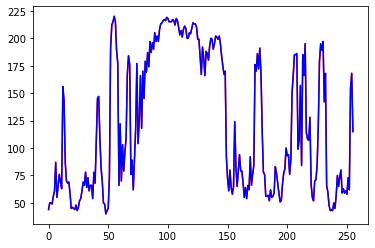

In [57]:
plt.plot(out_inds[2], 'r', targets[2], 'b')

In [42]:
for i in range(8):
    loss_val = torch.mean(loss(outputs[i], targets[i].long()))
    print(loss_val.item())

18.60439109802246
17.260879516601562
22.203916549682617
16.86305046081543
16.920394897460938
13.795106887817383
18.364038467407227
22.447723388671875


In [45]:
torch.mean(loss(outputs.reshape(-1, outputs.shape[2]), targets.reshape(-1)))

tensor(18.3074)

In [41]:
targets.shape

torch.Size([8, 256])